# Sesión 5

## El error (ε) en regresión lineal: de la geometría a la estadística

![Imagen resumen](../images/sesion5_resumen_2.png)

> **Objetivos de la clase:**
> - Recordar el ajuste de curvas polinomiales.
> - Entender el fenómeno de overfitting en casos prácticos.
> - Explicar los mínimos cuadrados ordinaros mediante el principio de máxima verosimilitud.

![Imagen resumen2](../images/sesion5_resumen.png)

## 1. Introducción

Suponga que tenemos un conjunto de entrenamiento con $N$ observaciones de $x$, 

$$[x_1, \dots, x_N],$$

en conjunto con las observaciones correspondientes de la variable objetivo $y$, 

$$[y_1, \dots, y_N].$$

En la siguiente gráfica mostramos datos de entrenamiento, con $N=20$. Estos datos se generaron eligiendo $x$ uniformemente espaciados en el intervalo $[0, 1]$, y la variable objetivo $y$ como el resultado de la función $\sin (2 \pi x)$ más un pequeño ruido distribuido normal:

```{thebe-button}
```

In [1]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Sembramos semilla
np.random.seed(0)

In [4]:
# Generamos datos ficticios
N = 21

x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.2, N)

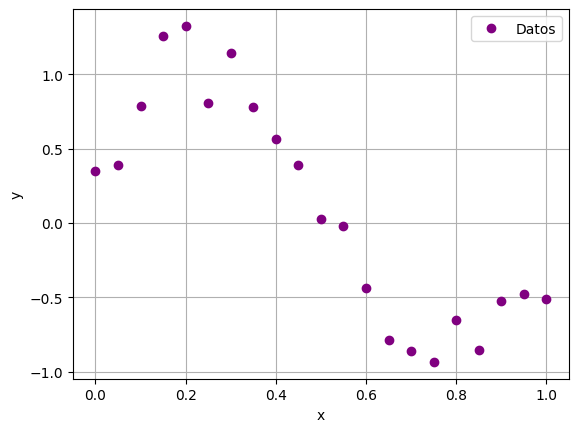

In [7]:
# Gráfica de los datos
plt.plot(x, y, 'o', label='Datos', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

*Objetivo:* 

Explotar estos datos de entrenamiento para hacer predicciones $\hat{y}$ de la variable objetivo para algún nuevo valor de la variable de entrada.

*Matemáticamente:*

Lo que queremos hacer es ajustar a los datos una función polinomial de la forma:

$$
f(x, w) = w_0 + w_1 x + w_2 x^{2} + \dots + w_M x^{M} = \sum_{j=0}^{M} w_j x^j.
$$

Notemos que aunque $f$ es una función no lineal de $x$, es una función **lineal respecto a los coeficientes $w$**.

```{admonition} Lineal respecto a los coeficientes/parámetros
:class: tip

**¿Qué significa que una función sea lineal respecto a sus parámetros?**

Una función es *lineal en los parámetros* cuando puede escribirse como una **combinación lineal de los coeficientes** (parámetros), aunque no necesariamente sea lineal en las variables explicativas.  

Por ejemplo, en un modelo de regresión lineal múltiple:

$$
f(x; \beta) = \beta_0 + \beta_1 x_1 + \beta_2 x_2,
$$

la relación con las variables $x_1, x_2$ es lineal, y también lo es con los parámetros $\beta_0, \beta_1, \beta_2$.  

En contraste, un modelo como:

$$
f(x; \beta) = \beta_0 + \beta_1 x + \beta_2 x^2,
$$

sigue siendo *lineal en los parámetros* ($\beta_0, \beta_1, \beta_2$), aunque no sea lineal en la variable $x$.  

Esto es clave porque permite aplicar métodos de optimización lineales (como OLS) para estimar los parámetros.
```